Exploring Features of NLTK Library

import required libraries

In [2]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
from nltk import sent_tokenize
from nltk import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from wordcloud import WordCloud

open text file for processing

In [11]:
input_txt_file=open('D:\Course_project_ml_5th_sem\Course_project_ml_5th_sem\data\sample_txt.txt')#input text
input_txt=input_txt_file.read()
print(type(input_txt))
print(len(input_txt))
print(input_txt)

<class 'str'>
737
Natural Language Processing (NLP) is a field of artificial intelligence focused on enabling computers to understand, analyze, and generate human language. It involves preprocessing text by breaking it into smaller units (tokenization), identifying grammatical components (part of speech tagging), and extracting meaningful entities (named entity recognition). NLP also encompasses semantic analysis to understand context and sentiment, machine translation, text generation, question answering, and topic modeling. Techniques like machine learning and deep learning, employing neural networks and transformers, are often used to achieve these tasks, enhancing computers' ability to comprehend and interact with human language effectively.


Tokenization

Sentence Tokenization

In [12]:
sentences=sent_tokenize(input_txt)
print(len(sentences))
sentences

4


['Natural Language Processing (NLP) is a field of artificial intelligence focused on enabling computers to understand, analyze, and generate human language.',
 'It involves preprocessing text by breaking it into smaller units (tokenization), identifying grammatical components (part of speech tagging), and extracting meaningful entities (named entity recognition).',
 'NLP also encompasses semantic analysis to understand context and sentiment, machine translation, text generation, question answering, and topic modeling.',
 "Techniques like machine learning and deep learning, employing neural networks and transformers, are often used to achieve these tasks, enhancing computers' ability to comprehend and interact with human language effectively."]

Word Tokenization

In [13]:
words_tokenized=word_tokenize(input_txt)
print(len(words_tokenized))
words_tokenized[:10]

119


['Natural',
 'Language',
 'Processing',
 '(',
 'NLP',
 ')',
 'is',
 'a',
 'field',
 'of']

frequency distribution

In [14]:
fdist=FreqDist(words_tokenized)
fdist.most_common(10)

[(',', 11),
 ('and', 7),
 ('(', 4),
 (')', 4),
 ('to', 4),
 ('.', 4),
 ('NLP', 2),
 ('of', 2),
 ('computers', 2),
 ('understand', 2)]

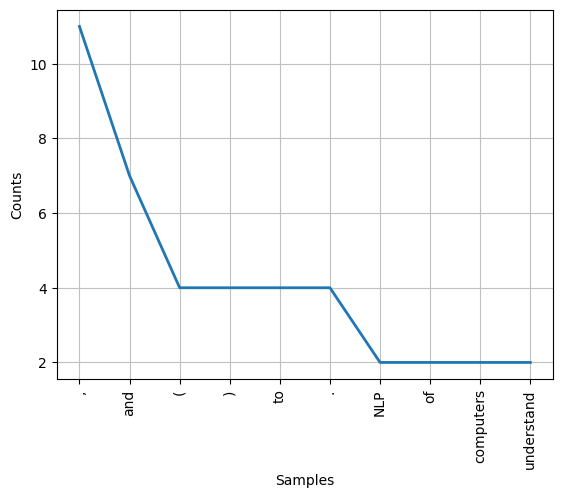

<Axes: xlabel='Samples', ylabel='Counts'>

In [15]:
# plt.figure(figsize=(10,6),facecolor='pink')
fdist.plot(10)

Remove Punctuaution Marks

In [16]:
text_without_punc=[]
for letters in words_tokenized:
    if letters.isalpha():
      text_without_punc.append(letters)
print(text_without_punc[:15])
print(len(text_without_punc))

['Natural', 'Language', 'Processing', 'NLP', 'is', 'a', 'field', 'of', 'artificial', 'intelligence', 'focused', 'on', 'enabling', 'computers', 'to']
95


In [17]:
fdist=FreqDist(text_without_punc)
fdist.most_common(10)

[('and', 7),
 ('to', 4),
 ('NLP', 2),
 ('of', 2),
 ('computers', 2),
 ('understand', 2),
 ('human', 2),
 ('language', 2),
 ('text', 2),
 ('machine', 2)]

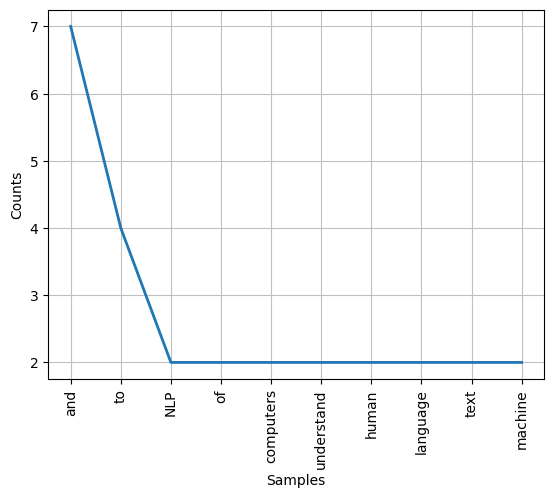

<Axes: xlabel='Samples', ylabel='Counts'>

In [18]:
fdist.plot(10)

WordCLoud

Word Cloud is a data visualization technique. In which words from a given text display on the main chart. In this technique, more frequent or essential words display in a larger and bolder font, while less frequent or essential words display in smaller or thinner fonts. It is a beneficial technique in NLP that gives us a glance at what text should be analyzed.

(-0.5, 399.5, 199.5, -0.5)

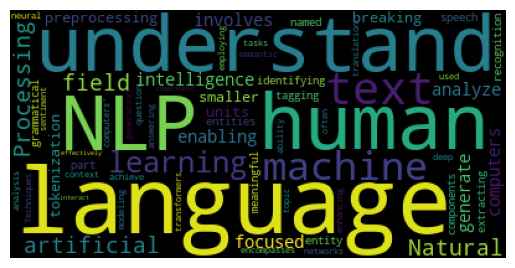

In [19]:
wordcloud=WordCloud().generate(input_txt) #
plt.imshow(wordcloud)
plt.axis('off')

Stemming

Stemming normalizes the word by truncating the word to its stem word. stemming may not give us a dictionary, grammatical word for a particular set of words.

In [12]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()
y=['study','studying','studies']
for i in y:
    print(ps.stem(i))

studi
studi
studi


In [13]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()
y=['chocolates', 'chocolatey', 'choco']
for i in y:
    print(ps.stem(i))

chocol
chocolatey
choco


Lemmetization

Lemmatization tries to achieve a similar base “stem” for a word. it finds the dictionary word instead of truncating the original word. Stemming does not consider the context of the word. That is why it generates results faster, but it is less accurate than lemmatization.

In [14]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [15]:
from nltk.stem import WordNetLemmatizer
l=WordNetLemmatizer()
y=['study','studying','studies']
for w in y:
    print(l.lemmatize(w))

study
studying
study


In [16]:
print(l.lemmatize('studying',pos="v"))
print(l.lemmatize('leaves'))

study
leaf


Pos Tagging(Parts of speech)

In [20]:
tag=nltk.pos_tag(['studying','study'])
print(tag)

[('studying', 'VBG'), ('study', 'NN')]


In [23]:
for words in words_tokenized:
    tagged_words=nltk.pos_tag(words_tokenized)
tagged_words[:10]

[('Natural', 'JJ'),
 ('Language', 'NNP'),
 ('Processing', 'NNP'),
 ('(', '('),
 ('NLP', 'NNP'),
 (')', ')'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('field', 'NN'),
 ('of', 'IN')]

In [19]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

Chunking

Chunking means to extract meaningful phrases from unstructured text.

In [20]:
grammar="NP:{<DT>?<JJ>*<NN>}"
""" DT represents determiner
    JJ represents adjectives
    NN represents singular or mass noun"""
parser=nltk.RegexpParser(grammar)
output=parser.parse(tagged_words)
print(output[:10])
output.draw()
# output.show()

[('Natural', 'JJ'), ('Language', 'NNP'), ('Processing', 'NNP'), ('(', '('), ('NLP', 'NNP'), (')', ')'), ('is', 'VBZ'), Tree('NP', [('a', 'DT'), ('field', 'NN')]), ('of', 'IN'), Tree('NP', [('artificial', 'JJ'), ('intelligence', 'NN')])]


Chinking

Chinking excludes a part from the chunk.
chinking is used when we there is a lot of unuseful data even after chunking.

In [21]:
grammar=r""" NP: {<.*>+}
             }<JJ>+{"""
parser=nltk.RegexpParser(grammar)
output=parser.parse(tagged_words)
print(output[:10])
output.draw()

[('Natural', 'JJ'), Tree('NP', [('Language', 'NNP'), ('Processing', 'NNP'), ('(', '('), ('NLP', 'NNP'), (')', ')'), ('is', 'VBZ'), ('a', 'DT'), ('field', 'NN'), ('of', 'IN')]), ('artificial', 'JJ'), Tree('NP', [('intelligence', 'NN'), ('focused', 'VBD'), ('on', 'IN'), ('enabling', 'VBG'), ('computers', 'NNS'), ('to', 'TO'), ('understand', 'VB'), (',', ','), ('analyze', 'NN'), (',', ','), ('and', 'CC'), ('generate', 'VB')]), ('human', 'JJ'), Tree('NP', [('language', 'NN'), ('.', '.'), ('It', 'PRP'), ('involves', 'VBZ'), ('preprocessing', 'VBG'), ('text', 'NN'), ('by', 'IN'), ('breaking', 'VBG'), ('it', 'PRP'), ('into', 'IN'), ('smaller', 'JJR'), ('units', 'NNS'), ('(', '('), ('tokenization', 'NN'), (')', ')'), (',', ','), ('identifying', 'VBG')]), ('grammatical', 'JJ'), Tree('NP', [('components', 'NNS'), ('(', '('), ('part', 'NN'), ('of', 'IN'), ('speech', 'NN'), ('tagging', 'NN'), (')', ')'), (',', ','), ('and', 'CC'), ('extracting', 'VBG')]), ('meaningful', 'JJ'), Tree('NP', [('entiti

Named Entity Recoginition

Named entity recognition can automatically scan entire articles and pull out some fundamental entities like people, organizations, places, date, time, money, and GPE discussed in them.

In [22]:
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [43]:
text='''
India, officially known as the Republic of India, is a country located in South Asia. '''
t=word_tokenize(text)
t_w=nltk.pos_tag(t) 
entities = nltk.ne_chunk(t_w,binary=False)#Geo Political entity countries cities
print(entities)

(S
  (GPE India/NNP)
  ,/,
  officially/RB
  known/VBN
  as/IN
  the/DT
  (ORGANIZATION Republic/NNP)
  of/IN
  (GPE India/NNP)
  ,/,
  is/VBZ
  a/DT
  country/NN
  located/VBN
  in/IN
  (GPE South/NNP Asia/NNP)
  ./.)


WordNet

In [11]:
from nltk.corpus import wordnet
for word in wordnet.synsets("the"):
    print(word)